# Master Energy Systems MILP Case Study

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.0.5"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


The following case study considers three locations along with their fluctuating local demand, weather profiles (capacity factors), and resource (natural gas) prices.

The following processes are considered - 

- Modular nuclear reactors (ASMR)
- Proton Exchange Membrane Electrolyzers (PEM)
- Hydrogen Storage (H2_L_c/H2_L_d)
- Natural Gas Combined Cycle with 95% carbon capture (NGCC)
- Pumped Storage Hydropower (PSH/PSH_discharge)
- Lithium-ion batteries (LiI/LiI_discharge)
- Solar Photovoltaics (PV) 
- Wind Farms (WF)
- Steam Methane Reforming (SMR)
- SMR + Carbon Capture Utilization and Storage (SMRH)
- Hydrogen Fuel Cells (H2FC)
- Direct Air Capture (DAC)
- Offshore Aquifers (AQoff)

The stated processes utilize the following resources:

- Methane (CH4)
- Carbon Dioxide (CO2)
- CO2 in aquifer (CO2_AQoff)
- CO2 Captured from air (CO2_DAC)
- Vented CO2 (CO2_Vent)
- Hydrogen (H2)
- Water (H2O)
- Stored hydrogen (H2_L)
- Power stored in LiI (LiI_Power)
- Oxygen (O2)
- Power stored in PSH (PSH_Power)
- Power
- Solar
- Uranium
- Wind


## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods p

$\mathcal{B}$ - set of transport modes b

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}$ - set of temporal periods p

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

## MILP Formulation



\begin{equation}
    min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} \alpha \times Capex_{l,p,t} \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
    \sum_{b \in \mathcal{B}} \Big(\sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t} Trans^{in}_{b,l,l',r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t}Trans^{out}_{b,l,l',r,t} \Big)
\end{equation*}

\begin{equation*}
    + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
    Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
    P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    Trans^{in/out}_{b, l, l', r,t} \leq Trans^{max-in/out}_{b, l,l', r,t} \times X^B_{b,l,l',r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch} , (l,l') \in \mathcal{L}^2, b \in \mathcal{B} 
\end{equation}


\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} + \sum_{l' \in \mathcal{L} \cap {l}}Trans^{in}_{l,l',r,t} = \sum_{l' \in \mathcal{L} \cap {l}} Trans^{out}_{l,l',r,t} + Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
    \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
    S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Trans^{in/out}_{b,l,l',r,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [1]:
import sys
sys.path.append('../../src')

In [2]:

from energiapy.components.result import Result
import pandas
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario, plot_location
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results, calculate_hourly
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.material import Material
from energiapy.components.case_study import CaseStudy
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.temporal_scale import TemporalScale
import numpy
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.aggregation.reduce_scenario import reduce_scenario, Clustermethod
from energiapy.aggregation.ahc import agg_hierarchial_elbow, IncludeAHC, Fit



## Data Import

The following data is needed for the model

- solar and wind profiles : energiapy.fetch_nsrdb_data imports data from the NREL NSRDB database
- power demand : ERCOT for Houston
- Natural Gas prices: Henry Hub 


In [3]:
horizon = 1

### Weather data

The fetch_nsrdb function accesses the [National Solar Radiation Database (NSRDB)](https://nsrdb.nrel.gov/) hosted by NREL on a Amazon Web Services (AWS) cloud through the h5py module To access large datasets, an API key can be requested from NREL.

download data at any latitude longitude (globally) or state-county (because of repetition of county names) pairs within the US.

Skim and fetch data which match different specifications, e.g. wind data for collection point at the highest elevation in the county.

While HSDS allows you to splice datasets, the script allows you to also find means within ranges.

Arrange data in a dataframe for multiscale analysis, with the temporal indices as tuples. [Can be saved as .csv/.txt/.json/.pkl]

Here, we import solar data as dni and wind data as wind speed for most populated data point in Harris county (TX) and San Diego county (SD) at an hourly resolution

#### San Diego

In [4]:
# fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016 , state='California',
#                                     county='San Diego', resolution='hourly', get='min-elevation')

In [5]:
# weather_sandiego = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i , state='California',
#                                     county='San Diego', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# index = weather_sandiego.index
# weather_sandiego.index = pandas.to_datetime(weather_sandiego.index, utc = True)
# weather_sandiego.index = weather_sandiego.index.strftime('%m/%d/%Y, %r')
# weather_sandiego = weather_sandiego[~weather_sandiego.index.str.contains('02/29')]


#### Houston

In [6]:

# weather_houston = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i, state='Texas',
#                                    county='Harris', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
# weather_houston.index = weather_houston.index.strftime('%m/%d/%Y, %r')
# weather_houston = weather_houston[~weather_houston.index.str.contains('02/29')]


In [7]:

# weather_houston.to_csv('weather_houston.csv')
# weather_sandiego.to_csv('weather_sandiego.csv')


**OR**

Import from existing datasets. The data in this case has been downloaded from the NSRDB Viewer

In [8]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19472\2873207647.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)


In [9]:
solar_houston = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

In [10]:
# solar_houston_max = calculate_hourly(data = solar_houston, what = 'max', column_name= 'PV_Power')
# solar_houston_min = calculate_hourly(data = solar_houston, what = 'min', column_name= 'PV_Power')
# solar_houston_mean = calculate_hourly(data = solar_houston, what = 'mean', column_name= 'PV_Power')

In [11]:
# solar_houston = pandas.concat([solar_houston]*2)

In [1]:
wind_houston = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

NameError: name 'wind_power_output' is not defined

In [13]:
# wind_houston_max = calculate_hourly(data = wind_houston, what = 'max', column_name= 'feedin_power_plant')
# wind_houston_min = calculate_hourly(data = wind_houston, what = 'min', column_name= 'feedin_power_plant')
# wind_houston_mean = calculate_hourly(data = wind_houston, what = 'mean', column_name= 'feedin_power_plant')

In [14]:
# wind_houston = pandas.concat([wind_houston]*2)

### Natural gas prices

Natural gas prices are from the Henry price index at a daily temporal resolution.

The energia.make_henry_price_df function implicitly fills in gaps in data such as weekends and public holidays by repeating the last recorded prices For e.g. if the 4th of July will use the price for the 3rd of July a typical saturday and sunday will take the values for the last friday.

The stretch functionality stretches the values over the hourly temporal scale (8760) from a daily temporal scale (365), again through repetition.

Moreover, we can remove outliers usig the remove_outliers features in data_utils

In [15]:
ng_price_df = pandas.concat(
    [make_henry_price_df(file_name='../data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv', year=2016 +i, stretch= True) for i in range(5)])

In [16]:
# ng_price_df = pandas.concat([ng_price_df]*2)

### Demand data

Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region

In [17]:
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19984\3085676995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


In [18]:
# ercot = pandas.concat([ercot]*2)

### Technology cost

NREL [Annual Technology Baseline (ATB)](https://atb.nrel.gov/) is a good source for technology cost and their expected trajectories. The annualy updated list categorizes trajectories based on the appetite for research and policy push and proposes three distinct scenarios:

- Advanced
- Moderate
- Conservative

The data for technologies not covered by ATB are drawn from literature. The trajectories for these technologies (mostly conventional) are set with only modest reduction rates as these have already stagnated in terms of cost, having witness generations of utility scale application; e.g. steam methane reforming (SMR). 

In [19]:
url = 'https://oedi-data-lake.s3.amazonaws.com/ATB/electricity/parquet/2022/ATBe.parquet'
raw_data = pandas.read_parquet(url)
raw_data = raw_data.astype(
    dtype={
        'core_metric_key': 'string',
        'core_metric_parameter': 'string',
        'core_metric_case': 'string',
        'crpyears': 'string',
        'technology': 'string',
        'technology_alias': 'string',
        'techdetail': 'string',
        'display_name': 'string',
        'scenario': 'string',
        'units': 'string'
    })


In [20]:
raw_data['technology'].unique()

<StringArray>
[                'NaturalGas_FE',    'Commercial Battery Storage',
     'Pumped Storage Hydropower',   'Residential Battery Storage',
 'Utility-Scale Battery Storage',                    'Hydropower',
                      'Biopower',                           'CSP',
                        'CommPV',               'DistributedWind',
                    'Geothermal',                 'LandbasedWind',
                  'OffShoreWind',                         'ResPV',
                     'UtilityPV', 'Utility-Scale PV-Plus-Battery',
                       'Nuclear',                       'Coal_FE',
                           'AEO']
Length: 19, dtype: string

In [21]:
def atb_gttr(core_metric_parameters, core_metric_case, crpyear, technology, techdetail, scenario):
    df_out = pandas.DataFrame()
    for i in core_metric_parameters:
        df = pandas.DataFrame(raw_data[
            (raw_data.core_metric_parameter == i) &
            (raw_data.core_metric_case == core_metric_case) &
            (raw_data.crpyears == str(crpyear)) &
            (raw_data.technology == technology) &
            (raw_data.techdetail == techdetail) &
            (raw_data.scenario == scenario)
        ][['value']])
        df = df.rename({'value': i}, axis='columns')
        df = df.reset_index()
        df_out = pandas.concat([df_out, df], axis='columns')
        df_out = df_out.loc[:, ~df_out.columns.duplicated()].copy()
        df_out = df_out.fillna(0)
        df_out = df_out.drop(columns=['index'])
    return df_out


In [22]:

hig_trl_adv = [(1 - i/(31*15)) for i in range(31)]
hig_trl_mod = [(1 - i/(31*10)) for i in range(31)]
hig_trl_con = [(1 - i/(31*5)) for i in range(31)]

med_trl_adv = [(1 - i/(31*40)) for i in range(31)]
med_trl_mod = [(1 - i/(31*30)) for i in range(31)]
med_trl_con = [(1 - i/(31*20)) for i in range(31)]

low_trl_adv = [(1 - i/(31*70)) for i in range(31)]
low_trl_mod = [(1 - i/(31*50)) for i in range(31)]
low_trl_con = [(1 - i/(31*30)) for i in range(31)]

hig_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_adv, 'Fixed O&M': hig_trl_adv, 'Variable O&M': hig_trl_adv})
hig_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_mod, 'Fixed O&M': hig_trl_mod, 'Variable O&M': hig_trl_mod})
hig_trl_con_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_con, 'Fixed O&M': hig_trl_con, 'Variable O&M': hig_trl_con})
med_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': med_trl_adv, 'Fixed O&M': med_trl_adv, 'Variable O&M': med_trl_adv})
med_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': med_trl_mod, 'Fixed O&M': med_trl_mod, 'Variable O&M': med_trl_mod})
med_trl_con_df = pandas.DataFrame(
    data={'CAPEX': med_trl_con, 'Fixed O&M': med_trl_con, 'Variable O&M': med_trl_con})
low_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': low_trl_adv, 'Fixed O&M': low_trl_adv, 'Variable O&M': low_trl_adv})
low_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': low_trl_mod, 'Fixed O&M': low_trl_mod, 'Variable O&M': low_trl_mod})
low_trl_con_df = pandas.DataFrame(
    data={'CAPEX': low_trl_con, 'Fixed O&M': low_trl_con, 'Variable O&M': low_trl_con})
constant_df = pandas.DataFrame(
    data={'CAPEX': [1]*31, 'Fixed O&M': [1]*31, 'Variable O&M': [1]*31})


param_list = ['CAPEX', 'Fixed O&M', 'Variable O&M']
advanced_dict = {
    'RPV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='ResPV', techdetail='Class5', scenario='Advanced'),
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Advanced'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Advanced'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Advanced'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Advanced'),
    'PSH_discharge': constant_df,
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Advanced'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_adv_df,
    'SMRH': hig_trl_adv_df,
    'AqOff': hig_trl_adv_df,
    'DAC': low_trl_adv_df,
    'PEM': low_trl_adv_df,
    'H2_Comp': med_trl_adv_df,
}


moderate_dict = {
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Moderate'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Moderate'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Moderate'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Moderate'),
    'PSH_discharge': constant_df,
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Moderate'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_mod_df,
    'SMRH': hig_trl_mod_df,
    'AqOff': hig_trl_mod_df,
    'DAC': low_trl_mod_df,
    'PEM': low_trl_mod_df,
    'H2_Comp': med_trl_mod_df,
}


conservative_dict = {
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Conservative'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Conservative'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Conservative'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Conservative'),
    'PSH_discharge': constant_df,
    # no cons, adv
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Conservative'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_con_df,
    'SMRH': hig_trl_con_df,
    'AqOff': hig_trl_con_df,
    'DAC': low_trl_con_df,
    'PEM': low_trl_con_df,
    'H2_Comp': med_trl_con_df,
}


## Define temporal scale


The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.

In [23]:
scales = TemporalScale(discretization_list=[horizon, 365, 24])


**Big and small M**

In [24]:
bigM = 10**5
smallM = 10

In [25]:
credit = {'DAC': {0: 31.77, 1: 31.77, 2: 31.77, 3: 31.77, 4: 31.77, 5: 50.00, 6: 50.00, 7: 50.00, 8: 50.00, 9: 50.00},
          'AqOff': {0: 20.22, 1: 20.22, 2: 20.22, 3: 20.22, 4: 20.22, 5: 35.00, 6: 35.00, 7: 35.00, 8: 35.00, 9: 35.00}
}


## Declare resources

Resources can be consumed, produced, stored, discharged (or sold). Resources measured as mass (sparing Uranium) are quantified on a per metric ton basis, energy feedstock and resources us a Mega Watt (MW) basis.

- Power and Hydrogen (H2) have varying demands which are captured using deterministic data inputs
- Methane (CH4) has varying purchase price

In [26]:
def model(name: str, year:int, cost_dict:dict, credit: dict = None, pathway: str = None):
    
    if pathway is None:
        pathway = 'full'
    
    #*---------------- Resources---------------------------------

    Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

    Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

    Power = Resource(name='Power', basis='MW', label='Power generated')#, demand = True)

    Uranium = Resource(name='Uranium', cons_max=100,
                    price=42.70/(250/2), basis='kg', label='Uranium')

    H2 = Resource(name='H2', basis='tons', label='Hydrogen')

    H2_C = Resource(name='H2(C)', basis='tons', label='Hydrogen(C)', demand=True, revenue= 0.005)

    CO2_AQoff = Resource(name='CO2_AQoff', basis='tons',
                        label='Carbon dioxide - sequestered', sell=True)

    H2O = Resource(name='H2O', cons_max=1000,
                price=3.00, basis='tons', label='Water', block='Resource')

    CH4 = Resource(name='CH4', cons_max=1000, price=max(ng_price_df['CH4'])*1000, basis='tons',
                label='Natural gas', varying=[VaryingResource.DETERMINISTIC_PRICE])

    CO2 = Resource(name='CO2', basis='tons',
                label='Carbon dioxide', block='Resource')

    CO2_Vent = Resource(name='CO2_Vent', sell=True, basis='tons',
                        label='Carbon dioxide - Vented')

    O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

    CO2_DAC = Resource(name='CO2_DAC', basis='tons',
                    label='Carbon dioxide - captured')

    LiI_Power = Resource(name='LiI_Power', basis='MW',
                        label='Power in LiI', store_max=10000, store_min=smallM)

    PSH_Power = Resource(name='PSH_Power', basis='MW',
                        label='Power in PSH', store_max=10000, store_min=smallM)

    #*---------------- Processes---------------------------------


    PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, O2: 2.8302, H2O: -3.1839}, capex= cost_dict['PEM']['CAPEX'][year]*1.55*10**6, 
                 fopex=0, vopex=0, prod_max=100, prod_min = 0, basis = 'tons', label = 'PEM' )

    # LiI = Process(name='LiI', storage=Power, capex=1302182, fopex=41432, vopex=2000,
    #             prod_max=100, prod_min=0, store_max=10000, label='Lithium-ion battery', basis='MW')


    LiI = Process(name='LiI', conversion={Power: -1, LiI_Power: 1}, capex= cost_dict['LiI']['CAPEX'][year]*1000, 
                 fopex=cost_dict['LiI']['Fixed O&M'][year]*1000, vopex=cost_dict['LiI']['Variable O&M'][year]*1000,
                store_max=10000, store_min=smallM, prod_max=bigM, prod_min=smallM, label='Lithium-ion battery', basis='MW', block='energy_storage')

    LiI_discharge = Process(name='LiI', conversion={Power: 1, LiI_Power: -1}, capex=0.1,
                            fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

    WF = Process(name='WF', conversion={Wind: -1, Power: 1}, capex= cost_dict['WF']['CAPEX'][year]*1000, 
                 fopex=cost_dict['WF']['Fixed O&M'][year]*1000, vopex=cost_dict['WF']['Variable O&M'][year]*1000, land = 10800/1800,
                prod_max=100, prod_min=0, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

    PV = Process(name='PV', conversion={Solar: -1, Power: 1}, capex= cost_dict['PV']['CAPEX'][year]*1000, 
                 fopex=cost_dict['PV']['Fixed O&M'][year]*1000, vopex=cost_dict['PV']['Variable O&M'][year]*1000,  land = 10000/1800,
                prod_max=100, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

    H2_Comp = Process(name='H2_Comp', conversion={Power: -0.417, H2_C: 1, H2: -1}, capex= cost_dict['H2_Comp']['CAPEX'][year]*1.6 *
                 10**6, fopex= 0, vopex= 0, prod_max=100, prod_min=0,  label='Hydrogen Compression')

    SMRH = Process(name='SMRH', conversion={Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 1.03, CO2: 9.332}, capex= cost_dict['SMRH']['CAPEX'][year]*252000, 
                 fopex=cost_dict['SMRH']['Fixed O&M'][year]*945000, vopex=cost_dict['SMRH']['Variable O&M'][year]*51.5,
                prod_max=bigM, prod_min=smallM,  label='Steam methane reforming + CCUS', block='h2_prod')

    NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108, CO2_Vent: 0.297*0.05, CO2: 0.297 *
                0.95},capex= cost_dict['NGCC']['CAPEX'][year]*1000, 
                 fopex=cost_dict['NGCC']['Fixed O&M'][year]*1000, vopex=cost_dict['NGCC']['Variable O&M'][year]*1000, prod_max=bigM, prod_min=smallM,  label='NGCC + 95% CC', block='power_gen')


    NG = Process(name='NG', conversion={Power: 1, CH4: -0.108, CO2_Vent: 0.297},capex= 0.3*cost_dict['NGCC']['CAPEX'][year]*1000, 
                 fopex= 0.3*cost_dict['NGCC']['Fixed O&M'][year]*1000, vopex= 0.3*cost_dict['NGCC']['Variable O&M'][year]*1000, prod_max=bigM, prod_min=smallM,  label='NGCC + 95% CC', block='power_gen')


    SMR = Process(name='SMR', capex= cost_dict['SMR']['CAPEX'][year]*240000, 
                 fopex=cost_dict['SMR']['Fixed O&M'][year]*800000, vopex=cost_dict['SMR']['Variable O&M'][year]*30,  conversion={
                Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 9.4979}, prod_max=bigM, prod_min=0.01,  label='Steam methane reforming', block='h2_prod')


    PSH = Process(name='PSH', conversion={Power: -1, PSH_Power: 1}, capex= cost_dict['PSH']['CAPEX'][year]*1000, 
                 fopex=cost_dict['PSH']['Fixed O&M'][year]*1000, vopex=cost_dict['PSH']['Variable O&M'][year]*1000, prod_max=bigM, prod_min=smallM, store_min=smallM, store_max=1000, label='Pumped storage hydropower', basis='MW', block='energy_storage')

    PSH_discharge = Process(name='PSH_discharge', conversion={Power: 1, PSH_Power: -1},  capex=0.1,
                            fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Pumped storage hydropower (d)', basis='MW')

    ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1}, capex= cost_dict['ASMR']['CAPEX'][year]*1000, 
                 fopex=cost_dict['ASMR']['Fixed O&M'][year]*1000, vopex=cost_dict['ASMR']['Variable O&M'][year]*1000, prod_max=bigM, prod_min=smallM, label='Small modular reactors (SMRs)', block='power_gen')

    AqOff = Process(name='AqOff', conversion={Power: -1.28, CO2_AQoff: 1, CO2: -1}, capex= cost_dict['AqOff']['CAPEX'][year]*552000, 
                fopex=0, vopex=cost_dict['AqOff']['Variable O&M'][year]*4.140, prod_max=bigM, prod_min=smallM,
                label='Offshore aquifer CO2 sequestration (SMR)', block='ccus')
    
    DAC = Process(name='DAC', capex= cost_dict['DAC']['CAPEX'][year]*1000, 
                fopex=cost_dict['DAC']['Fixed O&M'][year]*1000, vopex=cost_dict['DAC']['Variable O&M'][year]*1000, conversion={
                Power: -0.193, H2O: -4.048, CO2_DAC: 1}, prod_max=bigM, prod_min=smallM,  label='Direct air capture', block='ccus')

    
    if pathway == 'full':
        
        process_set = {LiI, WF, ASMR, PEM, H2_Comp, NGCC, AqOff, PSH, SMR, SMRH, PV}
    
    if pathway == 'green':
        
        process_set = {LiI, WF, ASMR, PEM, H2_Comp, PSH, PV}
    
    if pathway == 'blue':
         
        process_set = {LiI, WF, H2_Comp, NGCC, AqOff, PSH, SMRH, PV}
    
    if pathway == 'grey':
        
        process_set = {LiI, H2_Comp, NG, PSH, SMR}
    
    #*---------------- Location---------------------------------
    
    if credit is not None:
        houston= Location(name='HO', processes=process_set, capacity_factor={PV: solar_houston[:8760*horizon], WF: wind_houston[:8760*horizon]}, price_factor={
                   CH4: ng_price_df[:8760*horizon]}, scales=scales, label='Houston (conservative)', expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, 
                          price_scale_level=2, land_cost = 10000, credit = {AqOff: credit['AqOff'][year], DAC: credit['DAC'][year]})
    else:
        houston= Location(name='HO', processes=process_set, capacity_factor={PV: solar_houston[:8760*horizon], WF: wind_houston[:8760*horizon]}, price_factor={
                   CH4: ng_price_df[:8760*horizon]}, scales=scales, label='Houston (conservative)', expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=2, land_cost = 10000)

    #*---------------- Scenario---------------------------------
    
    scenario = Scenario(name=name, network=houston, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=2,
                    network_scale_level=0, demand_scale_level=1, purchase_scale_level=2, capacity_scale_level = 2, label='full_case', demand={houston: {H2_C: 0.2740}}, annualization_factor = 0.1)

    scenario_reduced, repday_reduced, info_reduced =  reduce_scenario(scenario=scenario, periods=40, scale_level=1, method=Clustermethod.AHC, include = [IncludeAHC.CAPACITY, IncludeAHC.PRICE])

    
    return scenario_reduced



In [27]:
span_ = 10

In [28]:
moderate_credit = CaseStudy(name = 'moderate_credit', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= moderate_dict, credit = credit) for i in range(span_)])
moderate_green = CaseStudy(name = 'moderate_green', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= moderate_dict, pathway = 'green') for i in range(span_)])
moderate_grey = CaseStudy(name = 'moderate_grey', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= moderate_dict, pathway = 'grey') for i in range(span_)])
moderate_blue = CaseStudy(name = 'moderate_blue', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= moderate_dict, pathway = 'blue') for i in range(span_)])

advanced = CaseStudy(name = 'advanced', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= advanced_dict) for i in range(span_)])
conservative = CaseStudy(name = 'conservative', scenarios= [model(name = f'scenario{i}', year= i, cost_dict=  conservative_dict) for i in range(span_)])
moderate = CaseStudy(name = 'moderate', scenarios= [model(name = f'scenario{i}', year= i, cost_dict= moderate_dict) for i in range(span_)])


In [29]:
# advanced.scenarios[0].cost_df

In [30]:
# moderate_grey.scenarios[0].cost_df


In [31]:
moderate_credit.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND, Constraints.CREDIT}, objective=Objective.COST)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint land process
constraint land location
constraint land network
constraint land process cost
constraint land location cost
constraint land network cost
constraint credit process
constraint credit location
constraint credit network
constraint inventory balance
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint land process
constraint land location
constraint land network
constraint land process cost
constraint land location cost
constraint land network cost
constraint credit process
constraint credit location
constraint credit network
constraint inventory balance
constraint storage facility
constraint 

{'scenario0_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246de42bdd0>,
 'scenario1_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246f3465670>,
 'scenario2_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246f6b222a0>,
 'scenario3_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246f9f56e80>,
 'scenario4_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246fe6179c0>,
 'scenario5_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x24682034590>,
 'scenario6_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2468571d0d0>,
 'scenario7_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x24688dfdd00>,
 'scenario8_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2468d3b69d0>,
 'scenario9_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x246908f3600>}

In [32]:
advanced.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)
conservative.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)

moderate.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)
moderate_green.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)
moderate_blue.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)

moderate_grey.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.LAND}, objective=Objective.COST)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint land process
constraint land location
constraint land network
constraint land process cost
constraint land location cost
constraint land network cost
constraint inventory balance
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint land process
constraint land location
constraint land network
constraint land process cost
constraint land location cost
constraint land network cost
constraint inventory balance
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint process capex
constraint pr

{'scenario0_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2477e855350>,
 'scenario1_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2477fff86d0>,
 'scenario2_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x247815efa10>,
 'scenario3_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x24782d8ad90>,
 'scenario4_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2478466e110>,
 'scenario5_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x24785df9490>,
 'scenario6_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x247875a4810>,
 'scenario7_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x24788b9bb50>,
 'scenario8_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2478a33eed0>,
 'scenario9_reduced': <pyomo.core.base.PyomoModel.ConcreteModel at 0x2478cbee250>}

In [33]:
# advanced.formulations

In [34]:
moderate_credit.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
advanced.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
conservative.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
moderate.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
moderate_green.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
moderate_blue.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')
moderate_grey.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')



Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x56e7c4b6
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.795885e+05, 7180 iterations, 0.26 seconds (0.34 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x6029bd59
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.16s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.605576e+05, 6493 iterations, 0.23 seconds (0.33 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x9d4d84f9
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.532886e+05, 6545 iterations, 0.24 seconds (0.34 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x272ba9fa
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.466773e+05, 7613 iterations, 0.24 seconds (0.34 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x6dfd6610
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.399810e+05, 7863 iterations, 0.25 seconds (0.35 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x262ef754
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.332243e+05, 7413 iterations, 0.22 seconds (0.33 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x5f5777db
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.266825e+05, 7781 iterations, 0.25 seconds (0.37 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x68beccbb
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.17s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.201090e+05, 7511 iterations, 0.28 seconds (0.35 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0xd5d9c977
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.22s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.134916e+05, 7452 iterations, 0.32 seconds (0.37 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45340 rows, 40496 columns and 129331 nonzeros
Model fingerprint: 0x60a9dd74
Variable types: 40483 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34325 rows and 33035 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.068283e+05, 7622 iterations, 0.28 seconds (0.40 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x100fe40c
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.16s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.796270e+05, 5912 iterations, 0.20 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x04117b8c
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.17s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.598942e+05, 5562 iterations, 0.15 seconds (0.16 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x4b8b43ac
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.503841e+05, 5539 iterations, 0.14 seconds (0.16 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xdafa467e
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.415065e+05, 4767 iterations, 0.10 seconds (0.12 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xd25d3239
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.16s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.325420e+05, 4846 iterations, 0.13 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x04f83e09
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.235933e+05, 5731 iterations, 0.16 seconds (0.18 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x9929ba40
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.147524e+05, 5047 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x1d63fd7f
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.057724e+05, 4832 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x577309c7
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 2.966878e+05, 5117 iterations, 0.12 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x8be15f48
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 2.875320e+05, 5168 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x100fe40c
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.796270e+05, 5912 iterations, 0.19 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xf243b36c
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.605620e+05, 5257 iterations, 0.14 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xed6055e2
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.578703e+05, 4980 iterations, 0.11 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xf919b3c4
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.558434e+05, 5451 iterations, 0.15 seconds (0.18 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x498bc22e
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.537695e+05, 5524 iterations, 0.12 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xd59fc2ac
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.13s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.517190e+05, 5941 iterations, 0.13 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xf5486792
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.498196e+05, 5587 iterations, 0.13 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x4ab1ad05
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.19s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.479106e+05, 4908 iterations, 0.15 seconds (0.12 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xe602bf96
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.460155e+05, 4749 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x158da3ea
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.441109e+05, 5416 iterations, 0.14 seconds (0.16 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x100fe40c
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.796270e+05, 5912 iterations, 0.16 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x5cd0a88d
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.605681e+05, 5645 iterations, 0.16 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xeb608202
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.13s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.532982e+05, 5227 iterations, 0.13 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xa2afe055
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.15s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.466882e+05, 5364 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xfa32d555
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.399932e+05, 4839 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x13ead0ff
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.333090e+05, 5652 iterations, 0.13 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x40f117ef
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.16s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.267546e+05, 5226 iterations, 0.14 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x716ec615
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.14s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.201821e+05, 5362 iterations, 0.12 seconds (0.14 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0xefc34a4d
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.13s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.135791e+05, 5777 iterations, 0.13 seconds (0.16 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45327 rows, 40483 columns and 129305 nonzeros
Model fingerprint: 0x446be222
Variable types: 40470 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 34312 rows and 33022 columns
Presolve time: 0.19s
Presolved: 11015 rows, 7461 columns, 36417 nonzeros
Variable types: 7454 continuous, 7 integer (7 binary)

Root relaxation: objective 3.069197e+05, 4813 iterations, 0.13 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0      

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0xd796fac5
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.10s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.571043e+08

Root relaxation: objective 7.263597e+05, 3108 iterations, 0.05 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0xc39929eb
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.486035e+08

Root relaxation: objective 6.818344e+05, 2985 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x92c7d5f5
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.11s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.458607e+08

Root relaxation: objective 6.672630e+05, 3071 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x75bf5df4
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.432024e+08

Root relaxation: objective 6.525959e+05, 2693 iterations, 0.03 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x9ebb52cd
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.10s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.406110e+08

Root relaxation: objective 6.379291e+05, 2883 iterations, 0.04 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x4573aa80
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.10s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.380726e+08

Root relaxation: objective 6.232194e+05, 2866 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x63e22d18
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.370362e+08

Root relaxation: objective 6.083534e+05, 2887 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x53fdc4f8
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.361055e+08

Root relaxation: objective 5.931655e+05, 2800 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x8928df22
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.353007e+08

Root relaxation: objective 5.772746e+05, 2879 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32795 rows, 26991 columns and 84082 nonzeros
Model fingerprint: 0x55cf9964
Variable types: 26982 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 25355 rows and 22220 columns
Presolve time: 0.09s
Presolved: 7440 rows, 4771 columns, 21297 nonzeros
Variable types: 4768 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.345369e+08

Root relaxation: objective 5.602460e+05, 2703 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0xd122e639
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.09s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.168705e+08

Root relaxation: objective 1.942245e+07, 1728 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0x52c1c237
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.10s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.086964e+08

Root relaxation: objective 1.921089e+07, 2189 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0xbe73d816
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.09s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.049092e+08

Root relaxation: objective 1.909476e+07, 1977 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0x988ceb2e
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.09s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.024787e+08

Root relaxation: objective 1.898358e+07, 1968 iterations, 0.03 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0x0800ed65
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.09s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 1.000275e+08

Root relaxation: objective 1.887131e+07, 1839 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0xbb5b8aaa
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.10s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 9.767313e+07

Root relaxation: objective 1.875909e+07, 2152 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0xb642b9ad
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.14s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 9.650730e+07

Root relaxation: objective 1.864794e+07, 1781 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0xc3438c48
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.09s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 9.543889e+07

Root relaxation: objective 1.853666e+07, 2149 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0x414998cf
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.10s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 9.453185e+07

Root relaxation: objective 1.842541e+07, 1967 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35688 rows, 30845 columns and 95630 nonzeros
Model fingerprint: 0x74948e6e
Variable types: 30835 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [8e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 28261 rows and 26073 columns
Presolve time: 0.10s
Presolved: 7427 rows, 4772 columns, 22235 nonzeros
Variable types: 4769 continuous, 3 integer (3 binary)
Found heuristic solution: objective 9.365791e+07

Root relaxation: objective 1.831402e+07, 2254 iterations, 0.03 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x2143b9db
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.93257e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.932565103018e+06, best bound 6.932565103018e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0xf2ca5f5c
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.9325e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.932497481979e+06, best bound 6.932497481979e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x5dfa7df4
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.49823e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.498231881682e+06, best bound 6.498231881682e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x38a27e9f
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.44553e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.445534202551e+06, best bound 6.445534202551e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0xd47fce1c
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.36652e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.366521494374e+06, best bound 6.366521494374e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x0e611430
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.07 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.30067e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.300666300720e+06, best bound 6.300666300720e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x8503a44a
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.24468e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.244679242958e+06, best bound 6.244679242958e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x228ebcdb
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.1854e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.185402806565e+06, best bound 6.185402806565e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x86d2337e
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.13599e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.135994506065e+06, best bound 6.135994506065e+06, gap 0.0000%


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 22205 rows, 19283 columns and 61595 nonzeros
Model fingerprint: 0x589443da
Variable types: 19276 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e-02, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+05]
Presolve removed 22205 rows and 19283 columns
Presolve time: 0.05s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.06 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 6.0833e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.083296826934e+06, best bound 6.083296826934e+06, gap 0.0000%


Results(name='moderate_grey_results', results={'scenario0_reduced': scenario0_reduced, 'scenario1_reduced': scenario1_reduced, 'scenario2_reduced': scenario2_reduced, 'scenario3_reduced': scenario3_reduced, 'scenario4_reduced': scenario4_reduced, 'scenario5_reduced': scenario5_reduced, 'scenario6_reduced': scenario6_reduced, 'scenario7_reduced': scenario7_reduced, 'scenario8_reduced': scenario8_reduced, 'scenario9_reduced': scenario9_reduced})

In [35]:
moderate.results.results['scenario0_reduced'].output['objective']

379627.02204942185

In [36]:
moderate_credit.results.results['scenario0_reduced'].output['objective']


379588.45771634544

In [37]:
advanced.results.results['scenario0_reduced'].output['S_network']['H2(C)', 0]

100.00999999999995

In [38]:
advanced.results.results['scenario0_reduced'].output['Vopex_process']

{('HO', 'ASMR', 0): 0.0,
 ('HO', 'AqOff', 0): 2.040206778565353,
 ('HO', 'H2_Comp', 0): 0.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'NGCC', 0): 7143.5995040945045,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PSH', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'SMR', 0): 2875.7505801068187,
 ('HO', 'SMRH', 0): 0.0,
 ('HO', 'WF', 0): 0.0}

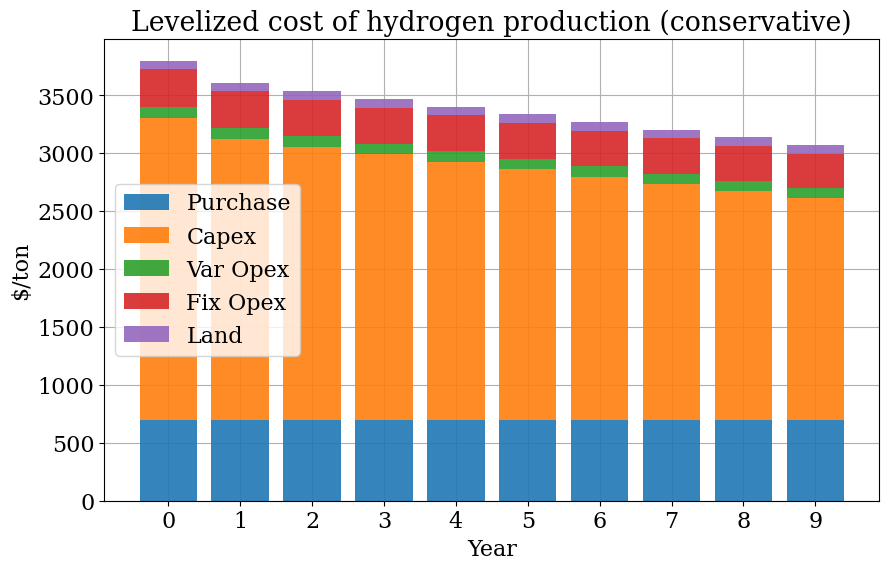

In [50]:
# results_ = list(advanced.results.results.values())
# results_ = list(conservative.results.results.values())
results_ = list(moderate.results.results.values())

s = advanced.results.results['scenario0_reduced'].output['S_network']['H2(C)', 0]
purchase = [sum(results_[i].output['B_network'].values())/s for i in range(span_)]
capex = [sum(results_[i].output['Capex_network'].values())/s for i in range(span_)]
vopex = [sum(results_[i].output['Vopex_network'].values())/s for i in range(span_)]
fopex = [sum(results_[i].output['Fopex_network'].values())/s for i in range(span_)]
land = [sum(results_[i].output['Land_cost_network'].values())/s for i in range(span_)]
data = [purchase, capex, vopex, fopex, land]
x_labels = [f'{i}' for i in range(span_)]
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
labels = ['Purchase', 'Capex', 'Var Opex', 'Fix Opex', 'Land']
ax.bar(x_labels, data[0], label= labels[0], zorder = 2, alpha = 0.9)
for i in range(1, len(data)):
    ax.bar(x_labels, data[i], bottom=numpy.sum(data[:i], axis=0), label= labels[i], zorder = 2, alpha = 0.9)
plt.grid(zorder = 0)
plt.xlabel('Year')
plt.ylabel('$/ton')
plt.title('Levelized cost of hydrogen production (conservative)')
plt.legend()
plt.rcdefaults()



In [40]:
moderate_credit.formulations['scenario0_reduced'].constraint_credit_process.pprint()

constraint_credit_process : credit generated for process
    Size=11, Index=constraint_credit_process_index, Active=True
    Key                  : Lower : Body                                                      : Upper : Active
       ('HO', 'ASMR', 0) :   0.0 :                                 Credit_process[HO,ASMR,0] :   0.0 :   True
      ('HO', 'AqOff', 0) :   0.0 : Credit_process[HO,AqOff,0] - 20.22*P_location[HO,AqOff,0] :   0.0 :   True
    ('HO', 'H2_Comp', 0) :   0.0 :                              Credit_process[HO,H2_Comp,0] :   0.0 :   True
        ('HO', 'LiI', 0) :   0.0 :                                  Credit_process[HO,LiI,0] :   0.0 :   True
       ('HO', 'NGCC', 0) :   0.0 :                                 Credit_process[HO,NGCC,0] :   0.0 :   True
        ('HO', 'PEM', 0) :   0.0 :                                  Credit_process[HO,PEM,0] :   0.0 :   True
        ('HO', 'PSH', 0) :   0.0 :                                  Credit_process[HO,PSH,0] :   0.0 :   True

In [68]:
moderate_blue.results.results['scenario0_reduced'].output['Fopex_process']

{('HO', 'AqOff', 0): 0.0,
 ('HO', 'H2_Comp', 0): 0.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'NGCC', 0): 0.0,
 ('HO', 'PSH', 0): 0.0,
 ('HO', 'PV', 0): 24823.57083546817,
 ('HO', 'SMRH', 0): 9450000.0,
 ('HO', 'WF', 0): 11257.043932629365}

In [71]:
moderate_green.results.results['scenario0_reduced'].output['Capex_process']

{('HO', 'ASMR', 0): 0.0,
 ('HO', 'H2_Comp', 0): 65565.45432997227,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'PEM', 0): 179577.42121051918,
 ('HO', 'PSH', 0): 0.0,
 ('HO', 'PV', 0): 377411.964300052,
 ('HO', 'WF', 0): 90438.8616338617}

In [41]:
results_ = list(conservative.results.results.values())
conservative_res = [results_[i].output['objective']/s for i in range(span_)]


In [51]:

results_ = list(moderate.results.results.values())
moderate_res = [results_[i].output['objective']/s for i in range(span_)]

results_ = list(advanced.results.results.values())
advanced_res = [results_[i].output['objective']/s for i in range(span_)]


results_ = list(moderate_credit.results.results.values())
moderate_credit_res = [results_[i].output['objective']/s for i in range(span_)]


results_ = list(moderate_green.results.results.values())
moderate_green_res = [results_[i].output['objective']/s for i in range(span_)]


results_ = list(moderate_blue.results.results.values())
moderate_blue_res = [results_[i].output['objective']/s for i in range(span_)]


results_ = list(moderate_grey.results.results.values())
moderate_grey_res = [results_[i].output['objective']/s for i in range(span_)]

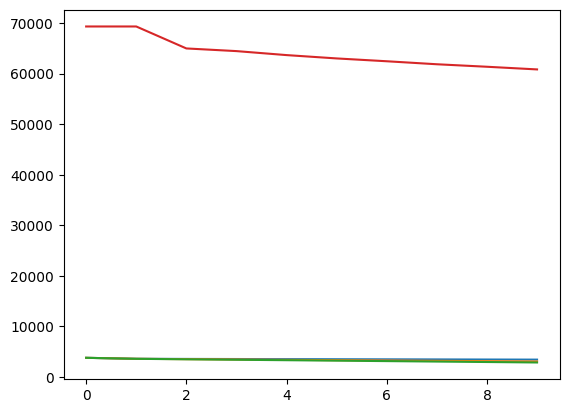

In [80]:
plt.plot(conservative_res)
plt.plot(moderate_res)
plt.plot(advanced_res)
# plt.plot(moderate_credit_res)
# plt.plot(moderate_green_res)
# plt.plot(moderate_blue_res)
# plt.plot(moderate_grey_res)



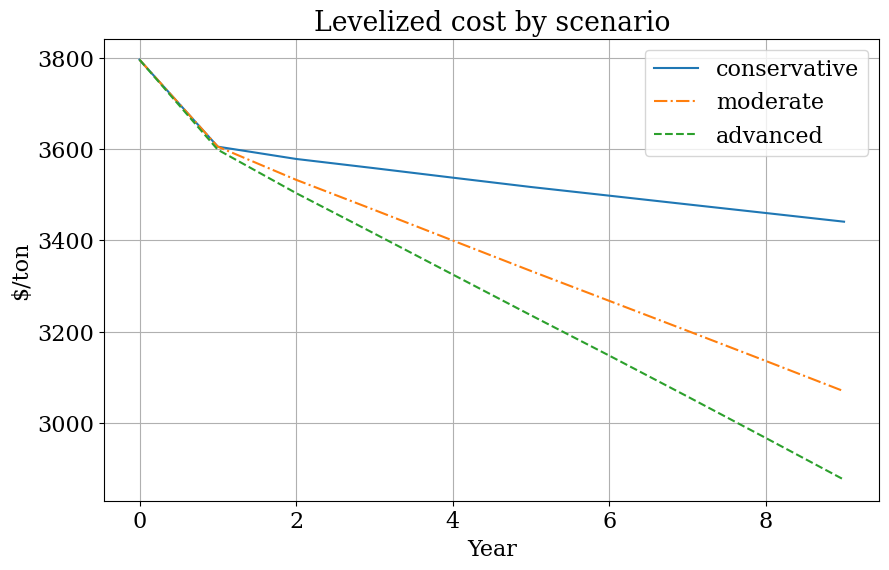

In [ ]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(conservative_res, label = 'conservative')
ax.plot(moderate_res, label = 'moderate', linestyle = '-.')
ax.plot(advanced_res, label = 'advanced', linestyle = '--')
plt.grid(zorder = 0)
plt.xlabel('Year')
plt.ylabel('$/ton')
plt.title('Levelized cost by scenario')
plt.legend()
plt.rcdefaults()